In [ ]:
!pip install textblob
!pip install git+https://github.com/tweepy/tweepy.git
!pip install tweepy

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-8xb3pmnz
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-8xb3pmnz


Importing tweepy library and using it to access Twitter API with keys

In [ ]:
import tweepy as tw
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt


In [ ]:
tw_bearer_token = "<Bearer_token>"


client = tw.Client(tw_bearer_token)
#client = tw.Client(tw_api_key, tw_api_secret_key,tw_access_token,tw_access_token_secret)
#auth = tw.OAuthHandler(tw_api_key, tw_api_secret_key)
#auth.set_access_token(tw_access_token, tw_access_token_secret)
#api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#Extracting tweets that contain '#hairloss' word:
search_words = "(stocks cryptocurrency) lang:en -is:retweet"
tweets_list = []

tweets = client.search_recent_tweets(query=search_words, max_results=100)
#tweets = client.search_recent_tweets(query=search_words, max_results=100)
#tweets = tw.Cursor(api.search_tweets, q=search_words, lang="en").items(100)
#[tweets_list.append(tweet) for tweet in tweets]

In [ ]:
#converting tweets to a DataFrame
df_tweets = pd.DataFrame(tweets.data)
df_tweets.head()

,id,text
0,1502070854879952900,Amazon’s Washington Strategy Wins Few New Frie...
1,1502070645441675271,"Rivian Makes an Unexpected Gift to Tesla, Ford..."
2,1502070406504660995,Here are the companies still doing business in...
3,1502070124869832705,Crypto news: Breaking Bad coin hits 2 Trillion...
4,1502070034348265493,Alibaba and Other Chinese Stocks Got Crushed T...


In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

#Cleaning the data---removing duplicates, punctuation, url links, cases(lower)
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_tweets['clean_text'] = df_tweets['text'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_tweets.drop_duplicates(inplace=True)

df_tweets.head(10)

,id,text,clean_text
0,1502070854879952900,Amazon’s Washington Strategy Wins Few New Frie...,amazon washington strategi win new friend bide...
1,1502070645441675271,"Rivian Makes an Unexpected Gift to Tesla, Ford...",rivian make unexpect gift tesla ford gm stock ...
2,1502070406504660995,Here are the companies still doing business in...,compani still busi russia undet stock money in...
3,1502070124869832705,Crypto news: Breaking Bad coin hits 2 Trillion...,crypto news break bad coin hit trillion dolla...
4,1502070034348265493,Alibaba and Other Chinese Stocks Got Crushed T...,alibaba chines stock got crush thursday here s...
5,1502069791066050563,Senseonics: Does Not Inspire A Long Term Inves...,senseon inspir long term invest commit nysesen...
6,1502069556185079816,Stock futures are flat as Dow heads for fifth ...,stock futur flat dow head fifth straight lose ...
7,1502068442966470659,Amazon halts sales in Russia amid Ukraine inva...,amazon halt sale russia amid ukrain invas stoc...
8,1502066666154438661,Swing Line indicator by Ron Black https://t.co...,swing line indic ron black prorealtim trade m...
9,1502063519503683585,"#Stocks, #Bitcoin freefall as #Inflation hits ...",stock bitcoin freefal inflat hit billbaruch cr...


In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df_tweets[['polarity', 'subjectivity']] = df_tweets['clean_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df_tweets['clean_text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  df_tweets.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  df_tweets.loc[index, 'sentiment'] = "positive"
 else:
  df_tweets.loc[index, 'sentiment'] = "neutral"
  df_tweets.loc[index, 'neg'] = neg
  df_tweets.loc[index, 'neu'] = neu
  df_tweets.loc[index, 'pos'] = pos
  df_tweets.loc[index, 'compound'] = comp
 

In [ ]:
df_tweets.head(10)

,id,text,clean_text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1502070854879952900,Amazon’s Washington Strategy Wins Few New Frie...,amazon washington strategi win new friend bide...,0.468182,0.427273,positive,NaN,NaN,NaN,NaN
1,1502070645441675271,"Rivian Makes an Unexpected Gift to Tesla, Ford...",rivian make unexpect gift tesla ford gm stock ...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
2,1502070406504660995,Here are the companies still doing business in...,compani still busi russia undet stock money in...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
3,1502070124869832705,Crypto news: Breaking Bad coin hits 2 Trillion...,crypto news break bad coin hit trillion dolla...,-0.150000,0.783333,positive,NaN,NaN,NaN,NaN
4,1502070034348265493,Alibaba and Other Chinese Stocks Got Crushed T...,alibaba chines stock got crush thursday here s...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
5,1502069791066050563,Senseonics: Does Not Inspire A Long Term Inves...,senseon inspir long term invest commit nysesen...,-0.050000,0.400000,positive,NaN,NaN,NaN,NaN
6,1502069556185079816,Stock futures are flat as Dow heads for fifth ...,stock futur flat dow head fifth straight lose ...,0.087500,0.262500,negative,NaN,NaN,NaN,NaN
7,1502068442966470659,Amazon halts sales in Russia amid Ukraine inva...,amazon halt sale russia amid ukrain invas stoc...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
8,1502066666154438661,Swing Line indicator by Ron Black https://t.co...,swing line indic ron black prorealtim trade m...,-0.166667,0.433333,neutral,0.0,1.0,0.0,0.0
9,1502063519503683585,"#Stocks, #Bitcoin freefall as #Inflation hits ...",stock bitcoin freefal inflat hit billbaruch cr...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

df_sent = pd.DataFrame(count_values_in_column(df_tweets,"sentiment"))

In [ ]:
df_sent

,Total,Percentage
positive,67,67.0
neutral,18,18.0
negative,15,15.0


([<matplotlib.patches.Wedge at 0x7f61eeb99bd0>,
 [Text(-0.5599456069679143, 0.9468162003458402, 'Positive-67%'),
  Text(0.06906971127148501, -1.0978293924762963, 'Neutral-18%'),
  Text(0.980107260768394, -0.4993893845378326, 'Negative-15%')])

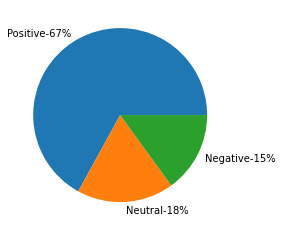

In [ ]:
from IPython.core.pylabtools import figsize
plt.pie(df_sent['Percentage'], labels=['Positive-67%', 'Neutral-18%', 'Negative-15%'])